<a href="https://colab.research.google.com/github/martinmedice/Learning_Data_Science/blob/main/(KNN)%20Case_Thera_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explicação do Case


**Encontrar os melhores potenciais
clientes.** 

---
O banco Thera Bank possui uma base de clientes crescente. A maioria
desses clientes são passivos (depositantes) com depósitos de tamanhos
variados. O número de clientes que também são devedores (clientes de
ativos) é bastante pequeno, e o banco está interessado em expandir essa
base rapidamente para trazer mais negócios de crédito e, no processo,
ganhar mais com os juros dos empréstimos. Em particular, a administração
deseja explorar maneiras de converter seus clientes passivos em clientes de
empréstimos pessoais (enquanto os mantém como depositantes). Uma
campanha que o banco realizou no ano passado para clientes passivos
mostrou uma taxa de conversão saudável de mais de 9% de sucesso. Isso
encorajou o departamento de marketing de varejo a elaborar campanhas
para melhor direcionar o marketing, a fim de aumentar a taxa de sucesso
com um orçamento mínimo.
O departamento quer construir um modelo de classificação que os
ajude a identificar os clientes potenciais com maior probabilidade de
adquirir o empréstimo. Isso aumentará a taxa de sucesso e, ao mesmo
tempo, reduzirá o custo da campanha.
A base de dados histórica contém informações pessoais dos clientes e
informações sobre produtos contratados. O arquivo também contém um
dicionário das variáveis.

---

Arquivo: [Bank_Personal_Loan_Modelling.xlsx](https://docs.google.com/spreadsheets/d/1XLC7jSBG7ElYSNDaHCEZ2V6YfZhWY5rH/edit#gid=640685944)


Modele o problema de classificação utilizando o algoritmo KNN Classifier.
Para isso:
1. Faça uma breve análise exploratória sobre a base de dados.
2. Divida a base de dados em treino/teste.
3. Configure o classificador KNN utilizando a biblioteca SciKit learn.
4. Encontre o melhor K que forneça a melhor acurácia.

Dicas: Teste normalização das variáveis numéricas.

# Import da base e bibliotecas

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np 

In [7]:
df= pd.read_excel("/content/drive/MyDrive/DEX - Martin Medice/Machine Learning/Modelos Supervisionados/Modelos de Classificação/KNN/Case Thera Bank/Bank_Personal_Loan_Modelling.xlsx", sheet_name='Data')

In [8]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


# Análise exploratória dos dados

In [ ]:
# Através da análise das variáveis e do dicionário, algums informações relevantes:


# Variáveis categóricas:
# Personal Loan (Empréstimo Pessoal) - Este cliente aceitou o empréstimo pessoal oferecido na última campanha? Esta é a nossa variável alvo
# Securities Account (Conta de títulos) - O cliente possui conta de títulos no banco?
# CD Account (Conta de CD) - O cliente tem uma conta de certificado de depósito (CD) no banco?
# Online - O cliente usa serviços de banco pela Internet?
# Credit Card - (Cartão de crédito) - O cliente usa um cartão de crédito emitido pelo UniversalBank?

# Variáveis contínuas:

# Age (Idade) Idade do cliente
# Experience (Experiência) - anos de experiência
# Income (Renda) - Renda anual em dólares
# CCAvg (CCAvg) - gasto médio com cartão de crédito
# Mortage (Hipoteca) - Valor da hipoteca da casa

# Variáveis ​​categóricas ordinais:
# Family (Família) - tamanho da família do cliente
# Education (Educação) - nível de educação do cliente


# A variável ID não adiciona nenhuma informação interessante. 
# Não há associação entre o ID de cliente de uma pessoa e o empréstimo, também não fornece nenhuma conclusão geral para futuros clientes de empréstimo em potencial. 
# Podemos desconsiderar essas informações para o modelo.
# Zip code também pode ser descosiderada, uma vez que a informação de distnância entre zip code pode não ser realidade

In [9]:
df.drop(columns=['ID','ZIP Code'],inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


Não há valores nulos no DataFrame

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


In [14]:
# Analisando a distribuição de 'Personal Loan'
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

**A BASE É DESBALANCEADA, PORÉM POR ENQUANTO NÃO IREMOS REALIZAR NENHUMA ALTERAÇÃO**

In [15]:
#Definindo variáveis preditoras e resposta
X = df.drop(columns=['Personal Loan'])
Y = df['Personal Loan']

# Dividindo bases entre treino e teste

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [20]:
print(f"Shape X_train: {X_train.shape}")
print(f"Shape y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}")
print(f"Shape y_test: {y_test.shape}")

Shape X_train: (3350, 11)
Shape y_train: (3350,)
Shape X_test: (1650, 11)
Shape y_test: (1650,)


Normalização das variáveis

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Transformanda para dataframe para visualização
X_train = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test = pd.DataFrame(X_test_scaled,columns = X_test.columns)

#Configurando o classificador KNN utilizando a biblioteca SciKit learn.

In [22]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

In [23]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
y_pred = knn.predict(X_test)

In [27]:
#Verificando a Acurácia do modelo inicial
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)*100

95.63636363636364

# Encontrando o melhor K que fornece a maior acurácia

In [30]:
acc = []
k_neighbors = range(3,25)

for k in k_neighbors:
  knn= KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  acc.append(accuracy_score(y_test, y_pred))

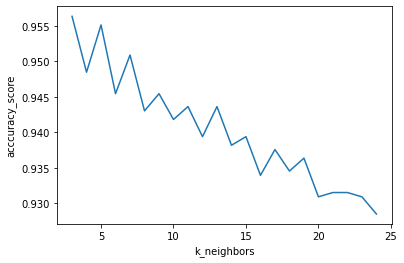

In [35]:
import matplotlib.pyplot as plt

plt.figure()
x = k_neighbors
y = acc
plt.plot(x, y,)
plt.xlabel('k_neighbors')
plt.ylabel('acccuracy_score')
plt.show()

Melhor valor de K=3, com acurácia de 0.956